**Goal**: Build an AI system that automatically detects fraudulent transactions or activities using machine learning.

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

# Create synthetic fraud dataset
print("Creating synthetic credit card fraud dataset...")

# Generate synthetic data
X, y = make_classification(
    n_samples=10000,
    n_features=30,
    n_informative=15,
    n_redundant=10,
    n_classes=2,
    weights=[0.99, 0.01],  # 1% fraud rate
    flip_y=0.01,
    random_state=42
)

# Create DataFrame
feature_names = [f'V{i}' for i in range(1, 29)] + ['Amount', 'Time']
df = pd.DataFrame(X, columns=feature_names)
df['Class'] = y  # 0 = Normal, 1 = Fraud

# Make it look more realistic
df['Amount'] = np.abs(df['Amount']) * 1000  # Transaction amounts
df['Time'] = np.arange(len(df))  # Time sequence

print(f"Dataset shape: {df.shape}")
print(f"Fraud rate: {df['Class'].mean():.4f}")
print("\nFirst few rows:")
print(df.head())

Creating synthetic credit card fraud dataset...
Dataset shape: (10000, 31)
Fraud rate: 0.0160

First few rows:
         V1        V2        V3        V4        V5        V6        V7  \
0  0.383283  0.543301 -3.229969 -2.427975 -1.896295 -3.349170  0.088241   
1  3.474953 -0.250861  0.203617 -0.324943  1.684572  2.788342 -0.445934   
2 -2.868443 -1.052716  2.902654  2.459920 -2.146290 -2.144200  1.508935   
3  1.773417 -0.917316 -2.783538  0.836488  3.991437  8.536251  0.209695   
4 -0.165094 -3.265044 -1.079552 -4.744022  0.276246  5.810212 -1.043492   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0 -0.343059 -0.237822 -1.574078  ...  0.891371  0.287736 -0.499462  1.803323   
1  1.503039 -7.279594  0.406089  ... -0.891789  2.172863  3.141551 -1.793414   
2 -0.686334  6.036062  0.095961  ...  0.426148 -2.735469  1.398849  8.599268   
3 -0.097028  2.529598  4.823325  ... -0.330354  3.246873 -2.977004 -6.099934   
4 -0.102086 -2.494922 -2.502946  ... -

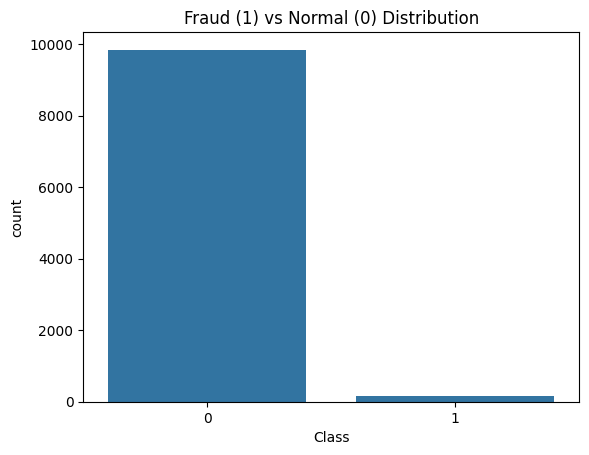

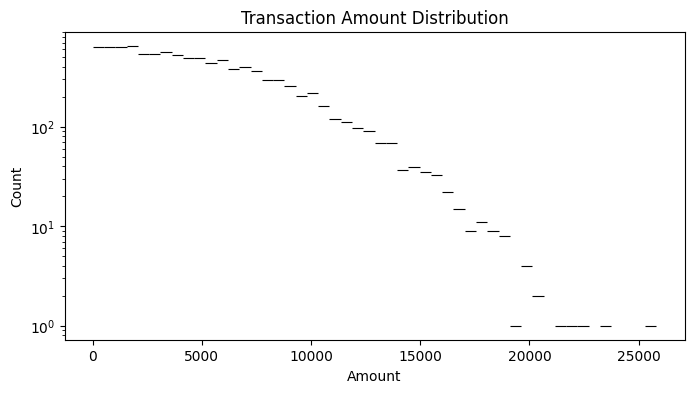

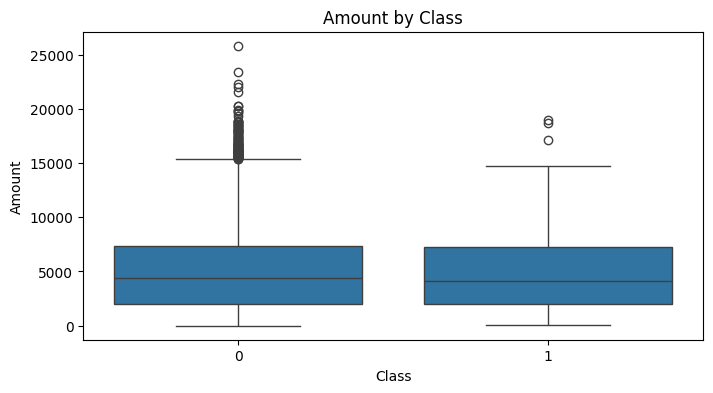

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fraud vs Non-Fraud distribution
sns.countplot(data=df, x="Class")
plt.title("Fraud (1) vs Normal (0) Distribution")
plt.show()

# Transaction amount distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, log_scale=(False, True))
plt.title("Transaction Amount Distribution")
plt.show()

# Fraud vs Non-Fraud by amount
plt.figure(figsize=(8,4))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Amount by Class")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and labels
X = df.drop(columns=['Class'])
y = df['Class']

# Train-test split (stratified to keep fraud balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

print("Training models...")

# Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
                    use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

Training models...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:48:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)


Logistic Regression Results:
              precision    recall  f1-score   support

           0     0.9940    0.7612    0.8622      1968
           1     0.0467    0.7188    0.0876        32

    accuracy                         0.7605      2000
   macro avg     0.5203    0.7400    0.4749      2000
weighted avg     0.9789    0.7605    0.8498      2000

ROC AUC: 0.7816469766260162


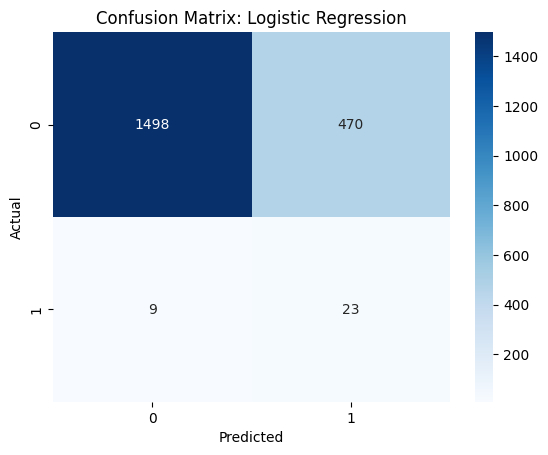


Random Forest Results:
              precision    recall  f1-score   support

           0     0.9845    1.0000    0.9922      1968
           1     1.0000    0.0312    0.0606        32

    accuracy                         0.9845      2000
   macro avg     0.9922    0.5156    0.5264      2000
weighted avg     0.9847    0.9845    0.9773      2000

ROC AUC: 0.8799701473577236


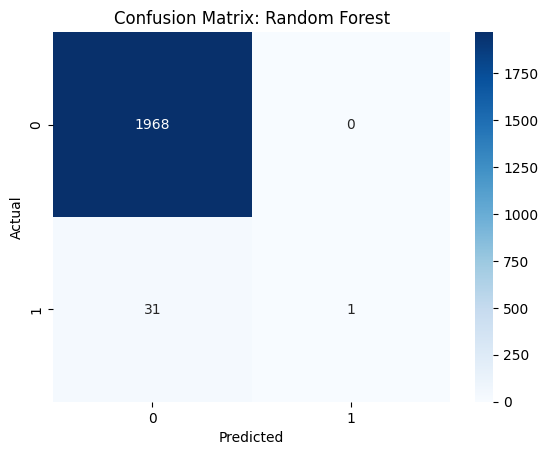


XGBoost Results:
              precision    recall  f1-score   support

           0     0.9889    1.0000    0.9944      1968
           1     1.0000    0.3125    0.4762        32

    accuracy                         0.9890      2000
   macro avg     0.9945    0.6562    0.7353      2000
weighted avg     0.9891    0.9890    0.9861      2000

ROC AUC: 0.8522929369918699


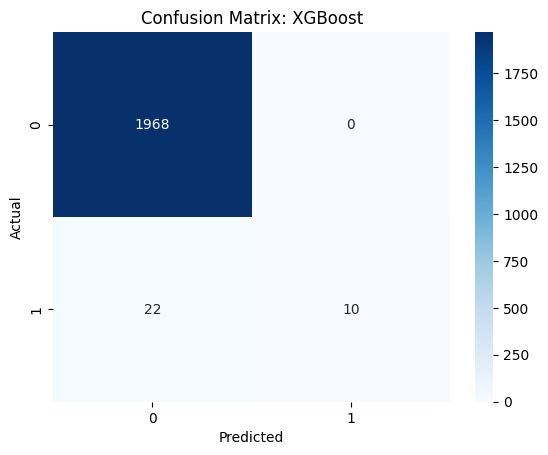

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled if "Logistic" in name else X_test)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred, digits=4))
    print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled if "Logistic" in name else X_test)[:,1]))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

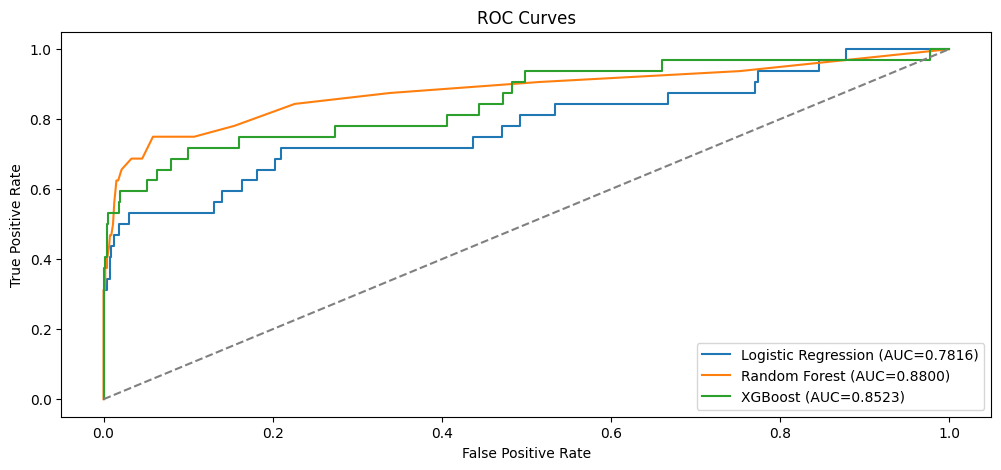

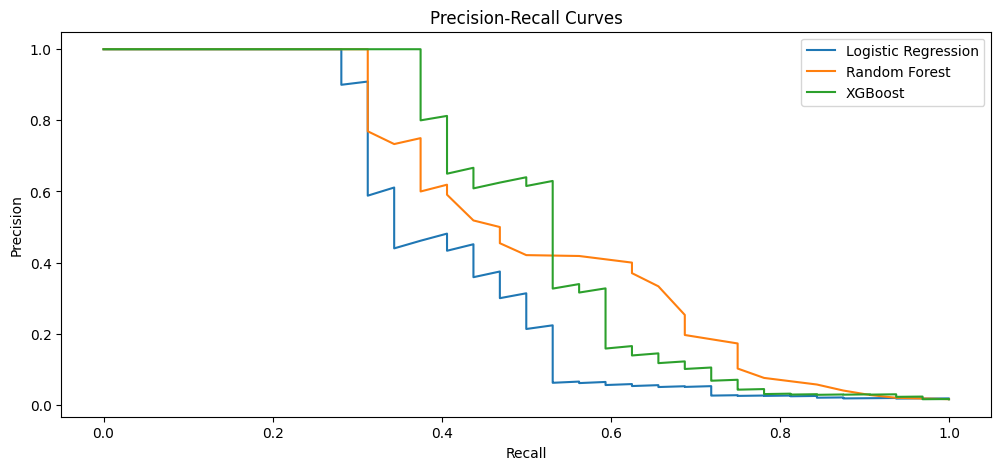

In [7]:
plt.figure(figsize=(12,5))

for name, model in models.items():
    y_scores = model.predict_proba(X_test_scaled if "Logistic" in name else X_test)[:,1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_scores):.4f})")

plt.plot([0,1],[0,1],'--',color='gray')
plt.legend()
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Precision-Recall
plt.figure(figsize=(12,5))
for name, model in models.items():
    y_scores = model.predict_proba(X_test_scaled if "Logistic" in name else X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.plot(recall, precision, label=name)

plt.legend()
plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


In [8]:
# Example new transaction
new_transaction = pd.DataFrame([{
    "V1": -1.2, "V2": 0.8, "V3": -0.3, "V4": 1.1, "V5": -0.5,
    "V6": 0.9, "V7": -0.2, "V8": 0.3, "V9": -0.7, "V10": 0.6,
    "V11": 0.2, "V12": -0.9, "V13": 0.5, "V14": 1.0, "V15": -0.4,
    "V16": 0.1, "V17": 0.2, "V18": -0.6, "V19": 0.8, "V20": 0.3,
    "V21": 0.4, "V22": -0.2, "V23": 0.5, "V24": 0.1, "V25": -0.7,
    "V26": 0.6, "V27": -0.1, "V28": 0.2,
    "Amount": 250.0, "Time": 10000
}])

# Scale the new transaction
scaled_new = scaler.transform(new_transaction)

print("Fraud Prediction Probabilities:")
for name, model in models.items():
    prob = model.predict_proba(scaled_new if "Logistic" in name else new_transaction)[:,1][0]
    print(f"{name}: {prob:.4f} (Fraud likelihood)")


Fraud Prediction Probabilities:
Logistic Regression: 0.5580 (Fraud likelihood)
Random Forest: 0.0350 (Fraud likelihood)
XGBoost: 0.0003 (Fraud likelihood)
